# KLMED8004: Medical Statistics, Part 1 (2018)

John Zobolas (Ioannis Zompolas)

PhD Candidate, Department of Biology, NTNU

September 2018

## Task 1: Problems 2.35-2.37

For the Microbiology study, we will first create a data frame with the data as they are in the Table 2.20, which shows the pod weight (g) from the inoculated (I) and uninoculated (U) plants:



In [34]:
sample_number = c(1,2,3,4,5,6,7,8)
I = c(1.76,1.45,1.03,1.53,2.34,1.96,1.79,1.21)
U = c(0.49,0.85,1.00,1.54,1.01,0.75,2.11,0.92)
plant_weight = cbind(sample_number,I,U)
plant_weight

sample_number,I,U
1,1.76,0.49
2,1.45,0.85
3,1.03,1.00
4,1.53,1.54
5,2.34,1.01
6,1.96,0.75
7,1.79,2.11
8,1.21,0.92


Next, we can easily calculate some descriptive statistics for the *I* and *U* plants (minimum and maximum values - the range is just the difference, arithmetic mean, median, 1st (25%) and 3rd (75%) quantiles):



In [35]:
summary(subset(plant_weight, select = c("I", "U")))

       I               U        
 Min.   :1.030   Min.   :0.490  
 1st Qu.:1.390   1st Qu.:0.825  
 Median :1.645   Median :0.960  
 Mean   :1.634   Mean   :1.084  
 3rd Qu.:1.833   3rd Qu.:1.143  
 Max.   :2.340   Max.   :2.110  


Also the variance, standard deviation and coefficient of variation are important measures to consider:


In [36]:
var_stats = c(var(I), var(U), sd(I), sd(U), (sd(I)/mean(I))*100, (sd(U)/mean(U))*100)
names(var_stats) = c("Variance (I)", "Variance (U)", "Standard Deviation (I)",
                     "Standard Deviation (U)", "CV (I)", "CV (U)")
var_stats

Variance (I)           Variance (U) Standard Deviation (I) 
             0.1763125              0.2598839              0.4198958 
Standard Deviation (U)                 CV (I)                 CV (U) 
             0.5097881             25.7013509             47.0392730

So, the minimum, maximum, average and median pod weight values are larger in the inoculated plants (I) compared to the uninoculated plants (U). This means that the inoculated plants yield more since they weight more on average. Also, the values for the inoculated plants' weights are less dispersed (smaller variance, standard deviation and CV) than the weight values of the uninoculated plants (with larger variance, standard deviation and CV).

We will use two graphic methods to compare the two groups of plants and confirm our findings. First a simple barplot which depicts the pod weight values side by side:


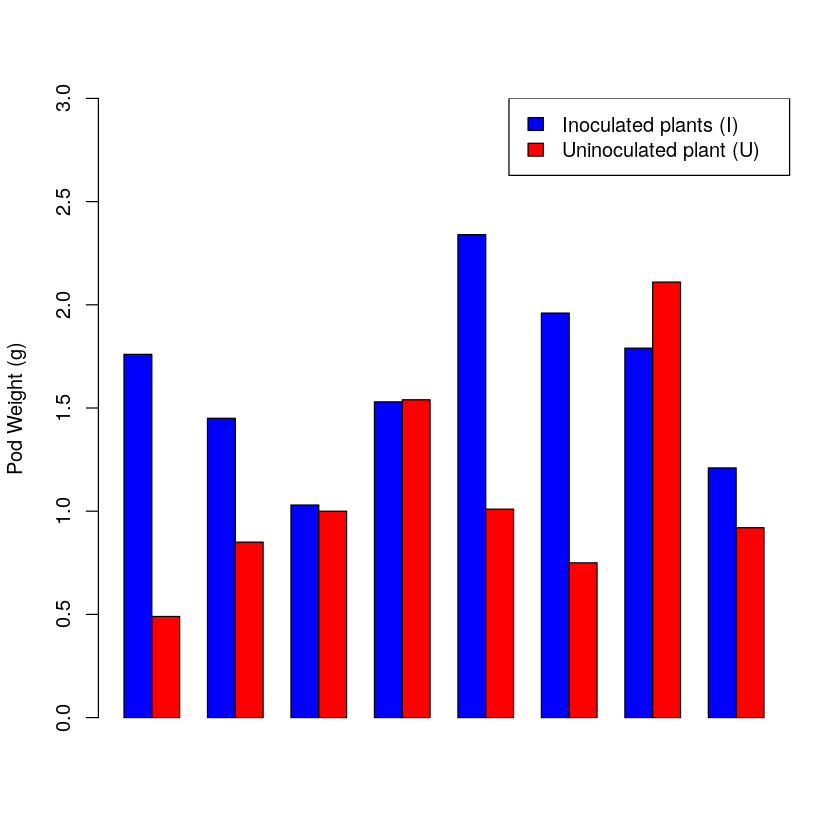

In [37]:
plant_data = rbind(I, U)
barplot(plant_data, beside=T, ylim = c(0,3), ylab = "Pod Weight (g)",
        col = c("blue","red"))
legend("topright",
       legend = c("Inoculated plants (I)", "Uninoculated plant (U)"),
       fill = c("blue", "red"))


The boxplot is the most descriptive graphic method in this case, as we see below:



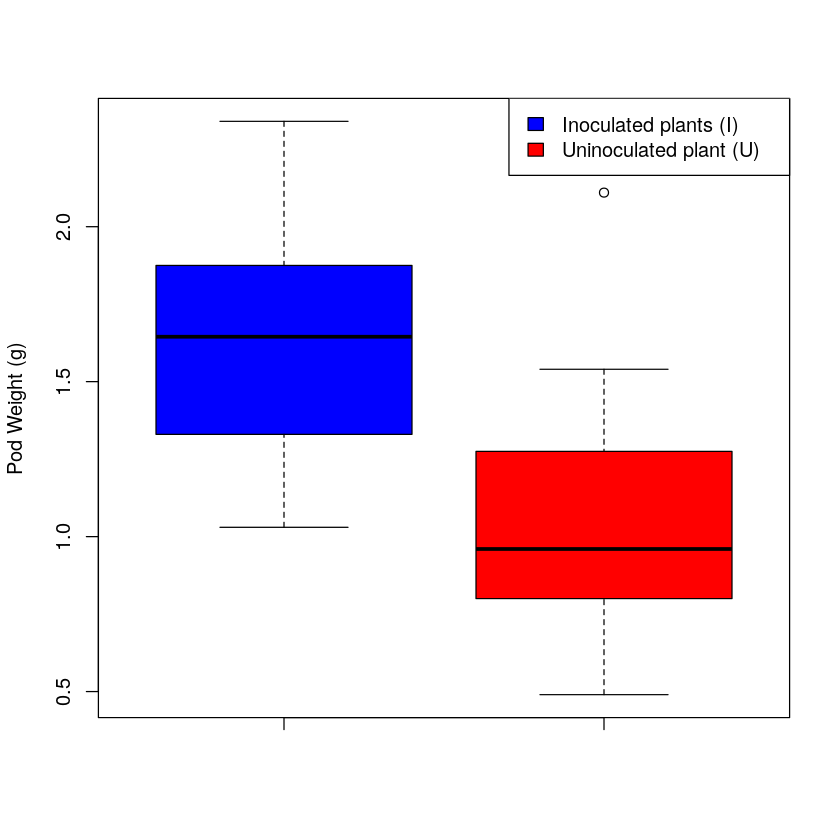

In [38]:
boxplot(I, U, ylab = "Pod Weight (g)", col = c("blue","red"))
legend("topright",
       legend = c("Inoculated plants (I)", "Uninoculated plant (U)"),
       fill = c("blue", "red"))


It's clear now that the *I* plants show a better (statistical) growth as measured by the pod weights.

## Task 2: Problems 2.23-2.24

Import the necessary library for reading SPSS files:


In [39]:
require(Hmisc)
# install it if you don't have it:
# install.packages("Hmisc")


Then convert the data:


In [40]:
fev_data = spss.get("./FEV.DAT.sav", use.value.labels=TRUE)
fev_data = subset(fev_data, select = c("Age", "FEV", "Hgt", "Sex", "Smoke"))


In this dataset, we have for 654 children, their age (between 3 and 19), their FEV (forced expiratory volume in liters), their height in inches, their sex (0 for female, 1 for male) and their (current) smoking status (1 if they smoke, 0 otherwise). We can obtain some descriptive statistics for each variable as follows:



In [41]:
summary(fev_data)

      Age              FEV             Hgt             Sex        
 Min.   : 3.000   Min.   :0.791   Min.   :46.00   Min.   :0.0000  
 1st Qu.: 8.000   1st Qu.:1.981   1st Qu.:57.00   1st Qu.:0.0000  
 Median :10.000   Median :2.547   Median :61.50   Median :1.0000  
 Mean   : 9.931   Mean   :2.637   Mean   :61.14   Mean   :0.5138  
 3rd Qu.:12.000   3rd Qu.:3.119   3rd Qu.:65.50   3rd Qu.:1.0000  
 Max.   :19.000   Max.   :5.793   Max.   :74.00   Max.   :1.0000  
     Smoke        
 Min.   :0.00000  
 1st Qu.:0.00000  
 Median :0.00000  
 Mean   :0.09939  
 3rd Qu.:0.00000  
 Max.   :1.00000  


So, we see that indeed the children ages are between 3 and 19 years while the average age is 10 years. Also, 50% of the FEV values are between 1.981 and 3.119 liters (1st and 3rd quantiles), the average height is ~61 inches, there is an equal number of males and females in the children sample and almost all of them are non-smokers (which is logical for a ~10 year old child - 65 of them were smoking actively though). The next boxplots and the sex barplot also confirm these observations.



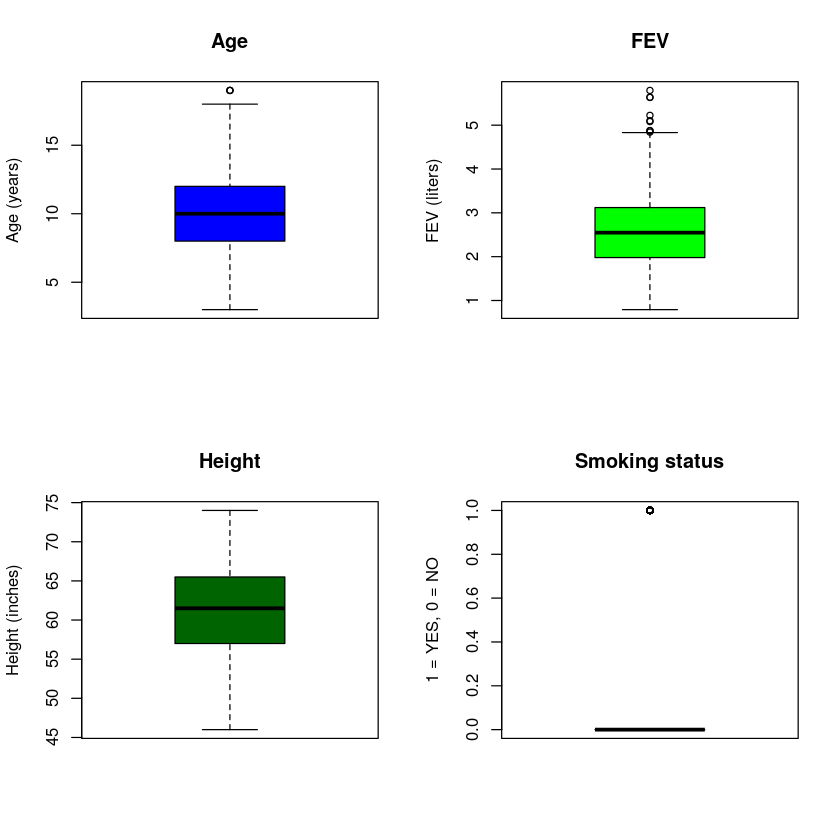

In [42]:
par(mfrow = c(2, 2))
boxplot(subset(fev_data, select = c("Age")), ylab = "Age (years)",
        main = "Age", col = "blue")
boxplot(subset(fev_data, select = c("FEV")), ylab = "FEV (liters)",
        main = "FEV", col = "green")
boxplot(subset(fev_data, select = c("Hgt")), ylab = "Height (inches)",
        main = "Height", col = "darkgreen")
boxplot(subset(fev_data, select = c("Smoke")), ylab = "1 = YES, 0 = NO",
        main = "Smoking status", col = "darkblue")

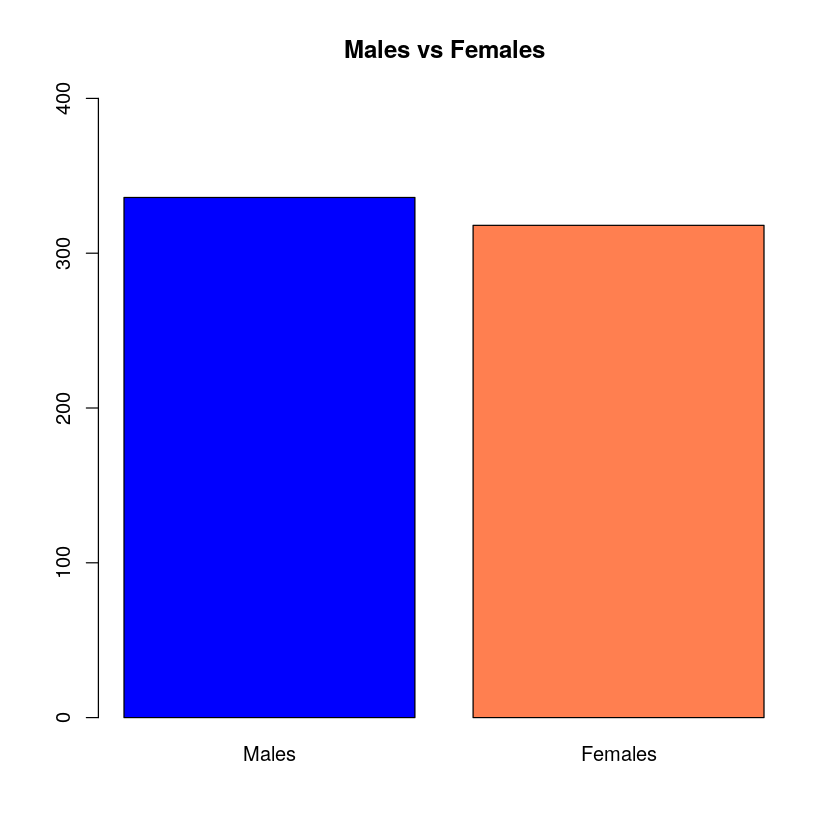

In [43]:
males = sum(fev_data$Sex == 1)
females = sum(fev_data$Sex == 0)
sex = c(males, females)
barplot(sex,  col = c("blue", "coral"), ylim = c(0, 400), main = "Males vs Females",
        names.arg = c("Males", "Females"))


We will now use numeric and graphic measures to assess the relationship of FEV to age, height and smoking status (seperately for each sex group). So, we split the dataset into two groups based on the sex:



In [44]:
boys  = subset(fev_data, Sex == 1)
girls = subset(fev_data, Sex == 0)


First, we will check the correlation of FEV to age:


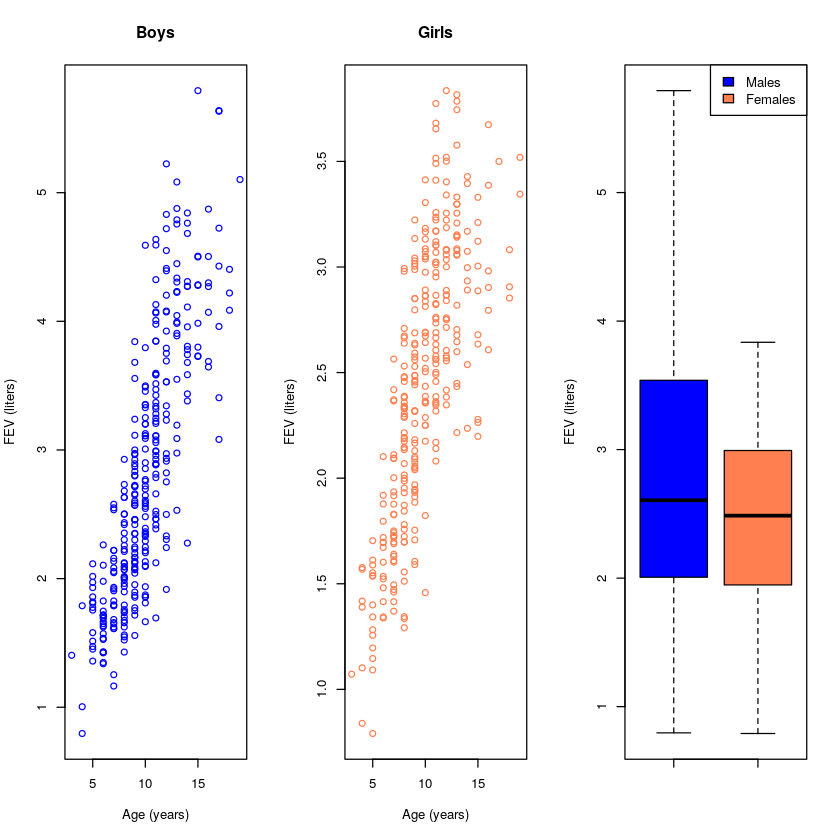

In [45]:
par(mfrow = c(1, 3))
plot(boys$Age, boys$FEV, col="blue", main = "Boys", ylab = "FEV (liters)", xlab = "Age (years)")
plot(girls$Age, girls$FEV, col="coral", main = "Girls", ylab = "FEV (liters)", xlab = "Age (years)")
boxplot(boys$FEV, girls$FEV, ylab = "FEV (liters)", col = c("blue","coral"))
legend("topright", legend = c("Males", "Females"), fill = c("blue", "coral"))


Based on the two scatter plots above we can conclude that the **FEV is directly correlated with age (no matter the sex) since the younger you are, the less FEV you have (and it increases the older you become)**. Also, we notice from the boxplots that the boys have a larger range of FEV values and there exist high FEV values that cannot be reached by any female (the median is almost the same though). This means that **FEV is correlated to sex**, since we generally observed higher pulmonary function indexes (FEVs) for the male subjects.

Now, we will check the correlation of FEV to height:



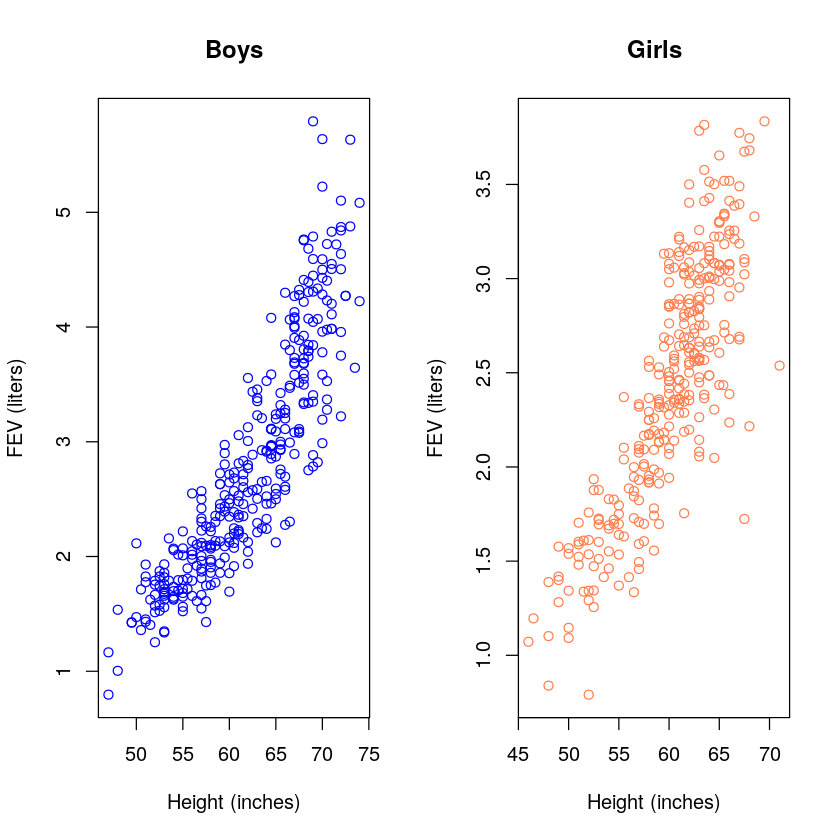

In [46]:
par(mfrow = c(1, 2))
plot(boys$Hgt, boys$FEV, main = "Boys", col="blue", ylab = "FEV (liters)", xlab = "Height (inches)")
plot(girls$Hgt, girls$FEV, main = "Girls", col="coral", ylab = "FEV (liters)", xlab = "Height (inches)")


So, **the taller you are, the higher your FEV is (for both sexes)**.
In the next two barplots we see the proportion of smokers in the two groups - as observed before, the smokers are very few and equally distributed between the two sexes as seen below:



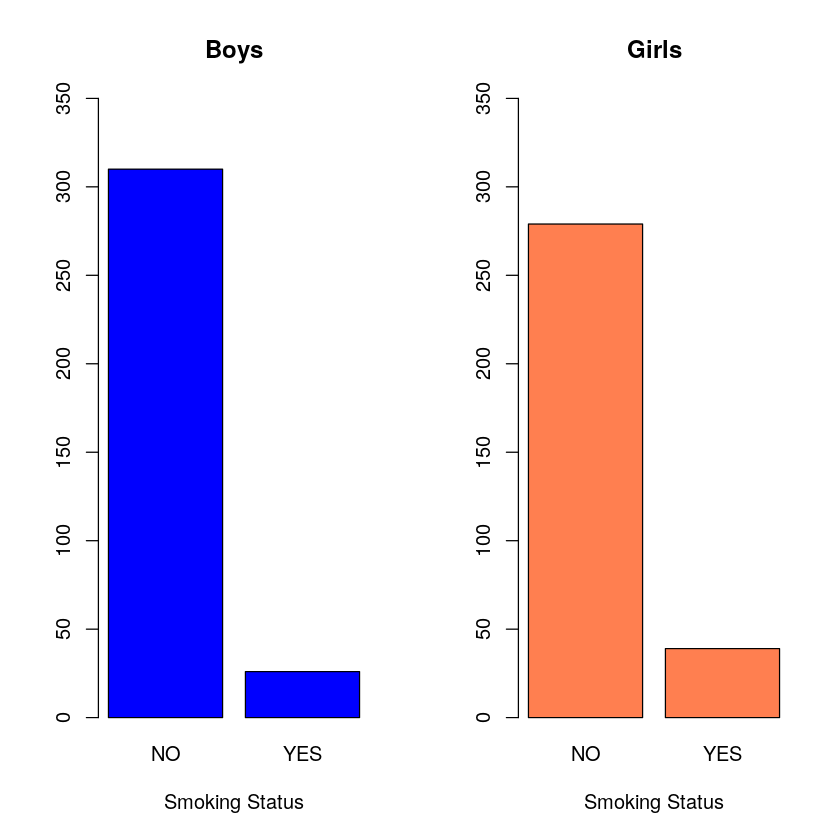

In [47]:
par(mfrow = c(1, 2))
barplot(table(boys$Smoke), main = "Boys", col="blue", ylim = c(0,350),
         xlab = "Smoking Status", names.arg = c("NO", "YES"))
barplot(table(girls$Smoke), main = "Girls", col="coral",  ylim = c(0,350),
         xlab = "Smoking Status", names.arg = c("NO", "YES"))


Now, we split further the datasets into 4 categories, taking into account both the sex and the smoking status:



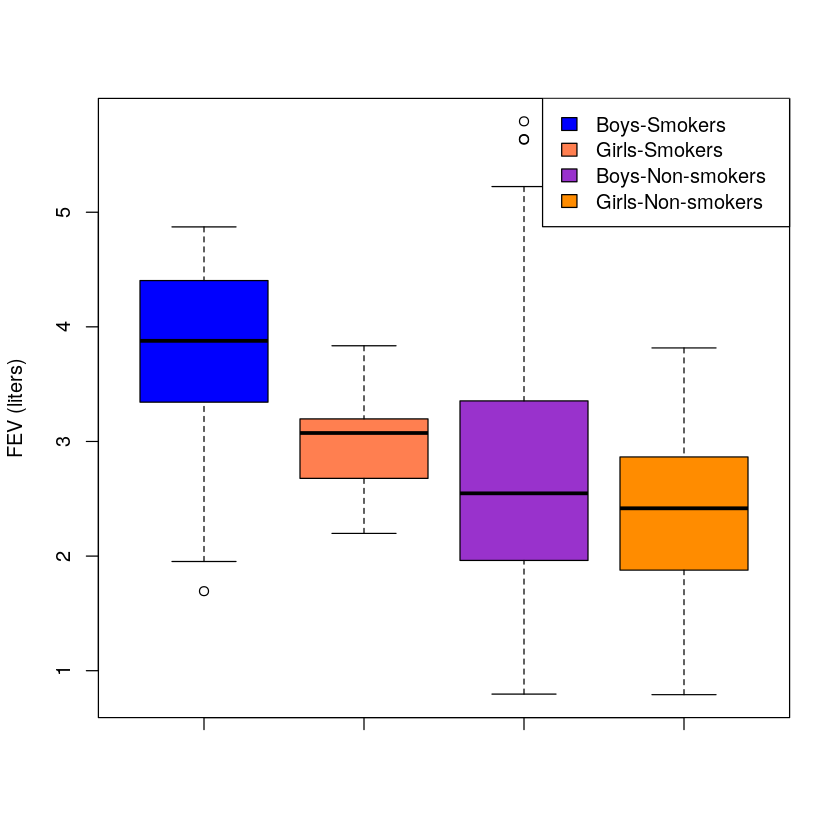

In [48]:
smoker_boys = subset(boys, Smoke == 1)
non_smoker_boys = subset(boys, Smoke == 0)
smoker_girls = subset(girls, Smoke == 1)
non_smoker_girls = subset(girls, Smoke == 0)

boxplot(smoker_boys$FEV, smoker_girls$FEV, non_smoker_boys$FEV, non_smoker_girls$FEV,
         ylab = "FEV (liters)", col = c("blue","coral","darkorchid","darkorange"))
legend("topright",
       legend = c("Boys-Smokers", "Girls-Smokers", "Boys-Non-smokers", "Girls-Non-smokers"),
       fill = c("blue","coral","darkorchid","darkorange"))


As we can see from the above boxplots, the males who smoke have the higher FEV values of all the 4 groups and generally it seems that **non-smokers tend to have smaller FEV values compared to the same-sex smoker group**.


